In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

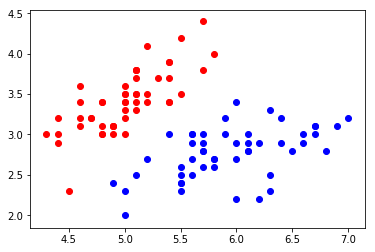

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [5]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X)
X_standard = standard.transform(X)

In [6]:
# SVM训练模型
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
# 绘制决策边界

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

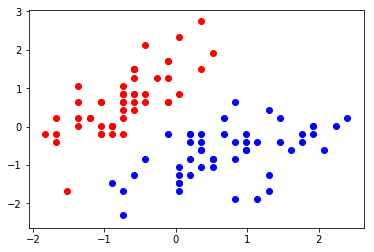

In [8]:
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

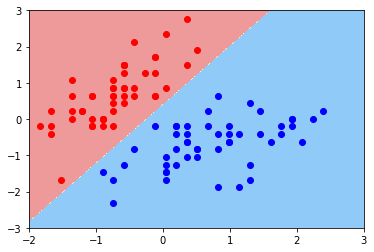

In [11]:
plot_decision_boundary(svc, [-2, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [13]:
# 修改模型中的C C值越小，容错空间越大，软间隔
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

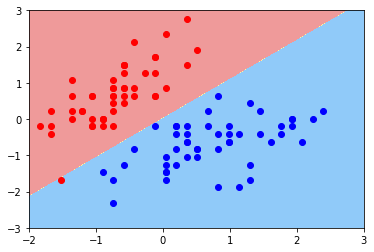

In [14]:
plot_decision_boundary(svc2, [-2, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

存在分类错误的样本

In [15]:
svc.intercept_

array([0.95365934])

In [16]:
svc.coef_

array([[ 4.0324122 , -2.49296951]])

In [17]:
# 绘制支持向量的两根线

def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0 * x0 + w1 * x1 + b = 1 / -1  ==> x1 = -w0 * x0 / w1 - b / w1 +1 / w1 (-1 / w1)
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0] / w[1] * plot_x - b / w[1] + 1/ w[1]
    down_y = -w[0] / w[1] * plot_x - b / w[1] - 1/ w[1]
    
    # 过
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

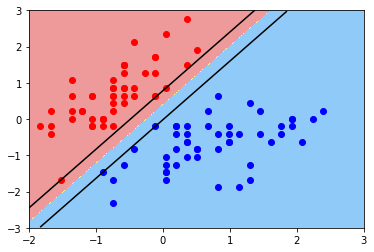

In [18]:

plot_svc_decision_boundary(svc, [-2, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

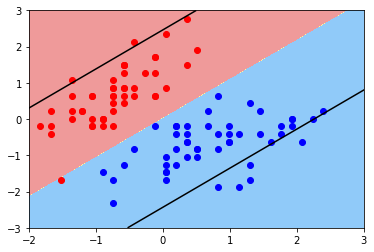

In [19]:
plot_svc_decision_boundary(svc2, [-2, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

# 针对线性不可分的数据  
## 1、多项式特征

In [20]:
# 采用sklearn 生成线性不可分数据

X, y = datasets.make_moons()

In [21]:
X.shape

(100, 2)

In [22]:
y.shape

(100,)

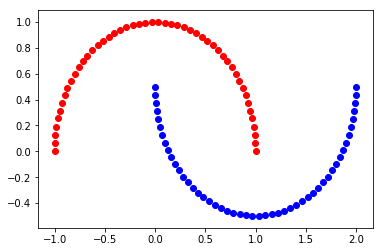

In [23]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

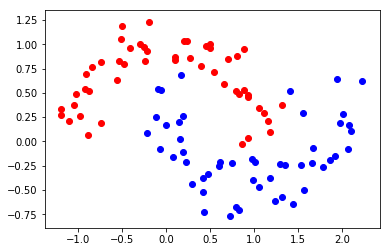

In [24]:
# 添加随机噪音

X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PoloynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

In [26]:
poly_svc = PoloynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

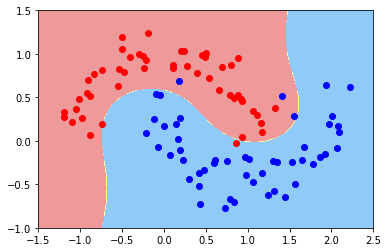

In [28]:
plot_decision_boundary(poly_svc, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

## 2、使用多项式核函数的SVM

In [29]:
from sklearn.svm import SVC

def Poloynomial_kernel_SVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVC', SVC(C=C, kernel='poly', degree=degree))
    ])

In [30]:
poly_kernel_svc = Poloynomial_kernel_SVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

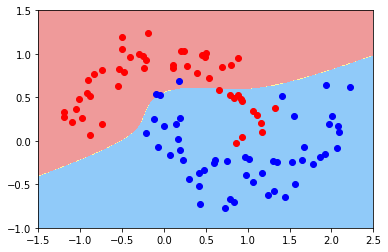

In [31]:
plot_decision_boundary(poly_kernel_svc, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

## 高斯核函数的应用

In [32]:
def RBF_kernel_SVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

In [33]:
svc_rbf = RBF_kernel_SVC()

svc_rbf.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

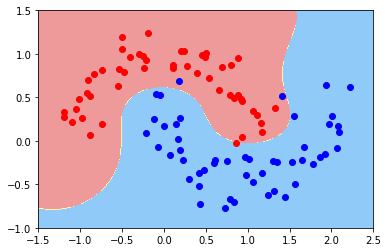

In [34]:
plot_decision_boundary(svc_rbf, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

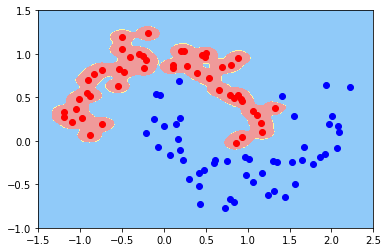

In [35]:
svc_rbf_100 = RBF_kernel_SVC(gamma=100)

svc_rbf_100.fit(X, y)

plot_decision_boundary(svc_rbf_100, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

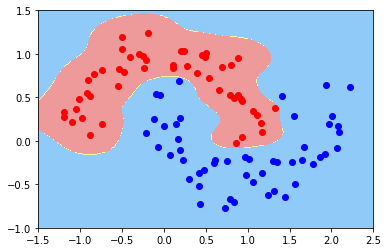

In [36]:
svc_rbf_10 = RBF_kernel_SVC(gamma=10)

svc_rbf_10.fit(X, y)

plot_decision_boundary(svc_rbf_10, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

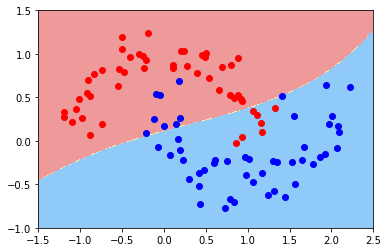

In [37]:
svc_rbf_01 = RBF_kernel_SVC(gamma=0.1)

svc_rbf_01.fit(X, y)

plot_decision_boundary(svc_rbf_01, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

# SVM在回归问题中的应用

In [38]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [40]:
from sklearn.svm import LinearSVR

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scale', StandardScaler()),
        ('LinearSVR', LinearSVR(epsilon=epsilon))
    ])

In [42]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LinearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [43]:
svr.score(X_test, y_test)

0.6359550912423115